# From: http://nbviewer.jupyter.org/urls/gist.githubusercontent.com/AlexanderFabisch/1a0c648de22eff4a2a3e/raw/59d5bc5ed8f8bfd9ff1f7faa749d1b095aa97d5a/t-SNE.ipynb

### Bad style, but copied from the URL: pollute name-space

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA

In [3]:
# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

In [4]:
# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [5]:
from sklearn.manifold import TSNE

help(TSNE)

Help on class TSNE in module sklearn.manifold.t_sne:

class TSNE(sklearn.base.BaseEstimator)
 |  t-distributed Stochastic Neighbor Embedding.
 |  
 |  t-SNE [1] is a tool to visualize high-dimensional data. It converts
 |  similarities between data points to joint probabilities and tries
 |  to minimize the Kullback-Leibler divergence between the joint
 |  probabilities of the low-dimensional embedding and the
 |  high-dimensional data. t-SNE has a cost function that is not convex,
 |  i.e. with different initializations we can get different results.
 |  
 |  It is highly recommended to use another dimensionality reduction
 |  method (e.g. PCA for dense data or TruncatedSVD for sparse data)
 |  to reduce the number of dimensions to a reasonable amount (e.g. 50)
 |  if the number of features is very high. This will suppress some
 |  noise and speed up the computation of pairwise distances between
 |  samples. For more tips see Laurens van der Maaten's FAQ [2].
 |  
 |  Read more in the 

In [6]:
# Load MNIST dataset
mnist = fetch_mldata("MNIST original")

## Machine doesn't have enough memory for full dataset
### Set mnist_data (resp., mnist_target) 
### to a random subset of mnist.data (resp., mnist.target) of size max_size

In [7]:
max_size=min(1000, mnist.data.shape[0])
ind = np.arange(mnist.data.shape[0])
np.random.shuffle(ind)

mnist_data = mnist.data[ ind[:max_size]]
mnist_target = mnist.target[ ind[:max_size]]

X, y = mnist_data / 255.0, mnist_target

In [8]:
# Create subset and reduce to first 50 dimensions
indices = arange(X.shape[0])
random.shuffle(indices)
n_train_samples = int(min(.80*X.shape[0], 5000))
X_pca = PCA(n_components=50).fit_transform(X)
X_train = X_pca[indices[:n_train_samples]]
y_train = y[indices[:n_train_samples]]

In [9]:
# Plotting function
matplotlib.rc('font', **{'family' : 'sans-serif',
                         'weight' : 'bold',
                         'size'   : 18})
# matplotlib.rc('text', **{'usetex' : True})

def plot_mnist(X, y, X_embedded, name, min_dist=10.0):
    fig = figure(figsize=(10, 10))
    ax = axes(frameon=False)
    #title("\\textbf{MNIST dataset} -- Two-dimensional "
    #      "embedding of 70,000 handwritten digits with %s" % name)
    setp(ax, xticks=(), yticks=())
    subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                    wspace=0.0, hspace=0.0)
    palette = np.array(sns.color_palette("hls", 10))
    
    scatter(X_embedded[:, 0], X_embedded[:, 1], lw=0, s=40,
            c=palette[y.astype(np.int)])

    if min_dist is not None:
        from matplotlib import offsetbox
        shown_images = np.array([[15., 15.]])
        indices = arange(X_embedded.shape[0])
        random.shuffle(indices)
        for i in indices[:min(indices.shape[0],5000)]:
            dist = np.sum((X_embedded[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist:
                continue
            shown_images = np.r_[shown_images, [X_embedded[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(X[i].reshape(28, 28),
                                      cmap=cm.gray_r), X_embedded[i])
            ax.add_artist(imagebox)

In [10]:
def Xscatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [11]:
X_train_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_train)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 800 / 800
[t-SNE] Mean sigma: 2.777200
[t-SNE] Iteration 25: error = 1.2133561, gradient norm = 0.0147050
[t-SNE] Iteration 50: error = 1.2334656, gradient norm = 0.0173425
[t-SNE] Iteration 75: error = 0.8851207, gradient norm = 0.0067343
[t-SNE] Iteration 100: error = 0.9044236, gradient norm = 0.0096743
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.904424
[t-SNE] Iteration 125: error = 0.8028701, gradient norm = 0.0037739
[t-SNE] Iteration 150: error = 0.8040617, gradient norm = 0.0061589
[t-SNE] Iteration 175: error = 0.8328274, gradient norm = 0.0074564
[t-SNE] Iteration 175: did not make any progress during the last 30 episodes. Finished.
[t-SNE] Error after 175 iterations: 0.904424


(<matplotlib.figure.Figure at 0x7f6b2e0be908>,
  <matplotlib.text.Text at 0x7f6b2a3eb160>])

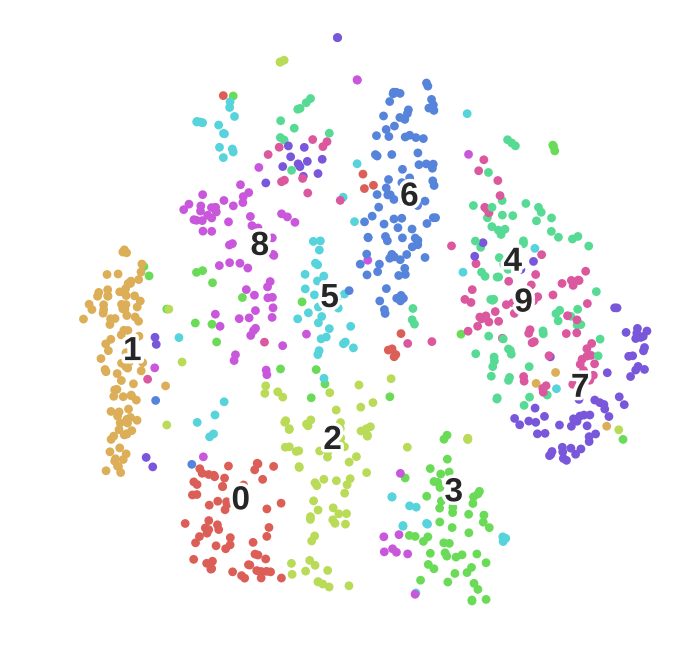

In [12]:
Xscatter(X_train_embedded, y_train)

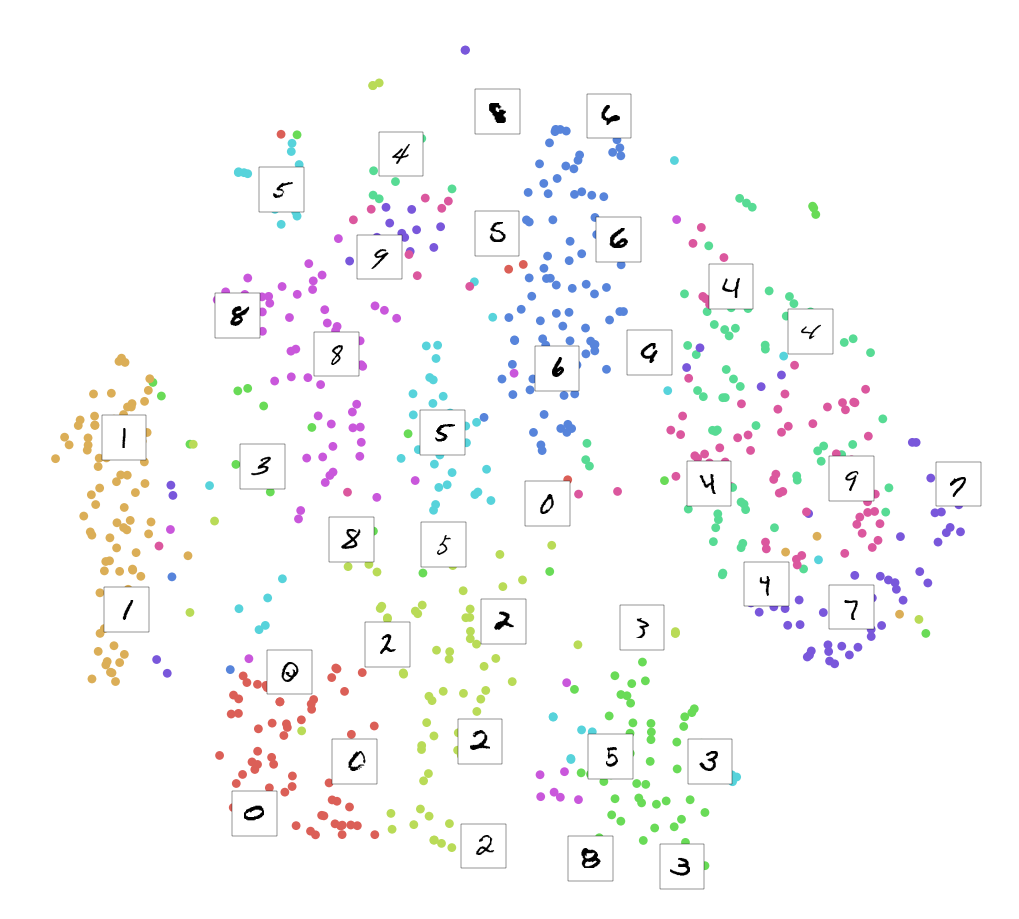

In [13]:
plot_mnist(X[indices[:n_train_samples]], y_train, X_train_embedded,
           "t-SNE", min_dist=20.0)
